In [2]:
# GPU TEST

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))    

Found GPU at: /device:GPU:0


In [3]:
# Importing libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

import pickle
import gzip
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [4]:
# Loading Dataset

with open('2016.04C.multisnr.pkl','rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

In [5]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], p.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(p[mod,snr])
        for i in range(p[(mod,snr)].shape[0]): lbl.append((mod,snr))
X = np.vstack(X)
print(X.shape)
print('One Sample : ')
print(X[1])

(162060, 2, 128)
One Sample : 
[[  -7.4243298   119.80825    -111.365616    -27.864609     49.59459
   -92.436195    -14.834814    -65.57745      99.30878    -140.20377
    -7.095288    160.27892     -29.569017    -46.14379     -83.981865
   155.57481      77.53324      21.80493     -48.08874      13.995204
    -9.42498     -77.13045      64.35481      51.588314    -10.118018
    59.934288     -8.07665     160.57787     -12.06533     -14.046684
     0.2559035   -34.061638    -62.329285    -37.375217    -20.721237
    35.750698     67.44018     -27.084063   -133.1575       20.650501
   -93.111984     46.712215     -7.806255    -56.23203      13.049609
    88.614685     15.365943     25.646896     68.06521    -167.36864
    65.36609     104.336044     40.968483     -2.8799818   -73.3598
    60.49153      66.64653     -50.082237    -26.81676      94.32984
   -59.568474     47.776936    -18.414425      2.6127734   140.26158
   -55.305504     91.71414      35.363003     26.607727    -21.209

In [6]:
X

array([[[  24.714563  ,  -29.568644  ,   92.68012   , ...,
           47.776936  ,  -18.414425  ,    2.6127734 ],
        [ -48.443947  ,    7.4777226 ,  -31.440838  , ...,
          -35.22897   ,  -18.624535  ,   55.108932  ]],

       [[  -7.4243298 ,  119.80825   , -111.365616  , ...,
          -31.315722  , -113.13201   ,   40.65939   ],
        [ 167.00078   ,  -21.273016  ,   38.65764   , ...,
         -115.24621   ,  -80.3968    ,   48.018898  ]],

       [[ 140.26158   ,  -55.305504  ,   91.71414   , ...,
            8.354092  ,  -52.09348   ,  -59.840755  ],
        [  12.849184  ,   23.583422  ,   -3.1462991 , ...,
           73.667694  ,   64.10245   ,   36.153652  ]],

       ...,

       [[  -0.7416414 ,   -0.7185424 ,   -0.689575  , ...,
           -0.7065344 ,   -0.7066991 ,   -0.6974531 ],
        [  -1.7302197 ,   -1.7222215 ,   -1.7496604 , ...,
           -1.729324  ,   -1.7172005 ,   -1.7255902 ]],

       [[  -0.6813814 ,   -0.69127196,   -0.6815096 , ...,
        

In [7]:
print('keys:')
print(p.keys())

keys:
dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('AM-SSB', 12), ('PAM4', 18), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('8PSK', -18), ('PAM4', -6), ('WBFM', -18), ('BPSK', 8), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('AM-SSB', 6), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('AM-SSB', -12), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('AM-DSB', -18), ('QPSK', 8), ('PAM4', 14), ('WBFM', -8), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('8PSK', -10), ('AM-SSB', -18), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('WBFM', -14), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('AM-SSB', 8), ('QAM16', 8), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('AM-SSB', -2), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('AM-SSB', 2), ('WBFM', 10), 

In [8]:
label=[]
mod=[]
data=[]
for i in range(len(lbl)):
        label.append(lbl[i][0])
        mod.append(lbl[i][1])
        data.append(X[i])

data=pd.DataFrame([label,mod,data])
dataset = data.T
print(dataset)

           0    1                                                  2
0       8PSK  -20  [[24.714563, -29.568644, 92.68012, -0.6211241,...
1       8PSK  -20  [[-7.4243298, 119.80825, -111.365616, -27.8646...
2       8PSK  -20  [[140.26158, -55.305504, 91.71414, 35.363003, ...
3       8PSK  -20  [[59.466553, -58.749474, -63.58964, 109.952866...
4       8PSK  -20  [[-18.136866, -86.98702, 2.8082519, -72.49883,...
...      ...  ...                                                ...
162055  WBFM   18  [[-0.4857278, -0.507521, -0.5296707, -0.518121...
162056  WBFM   18  [[-0.4470213, -0.43725014, -0.43090314, -0.432...
162057  WBFM   18  [[-0.7416414, -0.7185424, -0.689575, -0.695628...
162058  WBFM   18  [[-0.6813814, -0.69127196, -0.6815096, -0.6873...
162059  WBFM   18  [[-0.6809907, -0.7188972, -0.6984149, -0.69268...

[162060 rows x 3 columns]


In [9]:
X1 = dataset.iat[79580,2]

X1 = X1.flatten()
print(X.shape)

import matplotlib.pyplot as plt
# visualizing the results
plt.figure(figsize=(3,3))
plt.plot(X1[1:129], color = 'blue', label = 'Dim-1')
plt.plot(X1[129:256], color = 'green', label = 'Dim-2')
plt.title("Signal energy diagram")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.legend()

(162060, 2, 128)


(162060, 2, 128)


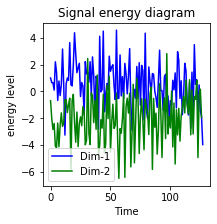

In [10]:
X1 = dataset.iat[14280,2]

X1 = X1.flatten()
print(X.shape)

import matplotlib.pyplot as plt
# visualizing the results
plt.figure(figsize=(3,3))
plt.plot(X1[1:129], color = 'blue', label = 'Dim-1')
plt.plot(X1[129:256], color = 'green', label = 'Dim-2')
plt.title("Signal energy diagram")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.legend()

(162060, 2, 128)


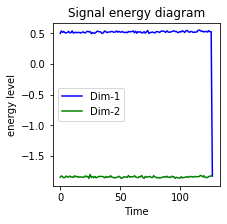

In [11]:
X1 = dataset.iat[21999,2]

X1 = X1.flatten()
print(X.shape)

import matplotlib.pyplot as plt
# visualizing the results
plt.figure(figsize=(3,3))
plt.plot(X1[1:129], color = 'blue', label = 'Dim-1')
plt.plot(X1[129:256], color = 'green', label = 'Dim-2')
plt.title("Signal energy diagram")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.legend()

In [12]:
X

array([[[  24.714563  ,  -29.568644  ,   92.68012   , ...,
           47.776936  ,  -18.414425  ,    2.6127734 ],
        [ -48.443947  ,    7.4777226 ,  -31.440838  , ...,
          -35.22897   ,  -18.624535  ,   55.108932  ]],

       [[  -7.4243298 ,  119.80825   , -111.365616  , ...,
          -31.315722  , -113.13201   ,   40.65939   ],
        [ 167.00078   ,  -21.273016  ,   38.65764   , ...,
         -115.24621   ,  -80.3968    ,   48.018898  ]],

       [[ 140.26158   ,  -55.305504  ,   91.71414   , ...,
            8.354092  ,  -52.09348   ,  -59.840755  ],
        [  12.849184  ,   23.583422  ,   -3.1462991 , ...,
           73.667694  ,   64.10245   ,   36.153652  ]],

       ...,

       [[  -0.7416414 ,   -0.7185424 ,   -0.689575  , ...,
           -0.7065344 ,   -0.7066991 ,   -0.6974531 ],
        [  -1.7302197 ,   -1.7222215 ,   -1.7496604 , ...,
           -1.729324  ,   -1.7172005 ,   -1.7255902 ]],

       [[  -0.6813814 ,   -0.69127196,   -0.6815096 , ...,
        

In [13]:
print('shape of all data : ')
print(X.shape)

shape of all data : 
(162060, 2, 128)


In [14]:
shapes = []
snrs = []
mod_types = []
for x in p.keys():
    shapes.append(p[x].shape)
    snrs.append(x[1])
    mod_types.append(x[0])
print('Same distribution of number of samples as shown : ')
print(sorted(shapes)[0:20])
print(sorted(shapes)[20:40])
print(sorted(shapes)[40:60])

Same distribution of number of samples as shown : 
[(206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128), (206, 2, 128)]
[(310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128), (310, 2, 128)]
[(413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128), (413, 2, 128)]


In [15]:
print("same modulation type but different SNRs:")
print(p["BPSK",-20].shape)
print(p["QPSK",-18].shape)
print(p["QPSK",-16].shape)
print(p["QPSK",-14].shape)
print(p["QPSK",-12].shape)
print(p["QPSK",-10].shape)
print(p["QPSK",-8].shape)
print(p["QPSK",-6].shape)
print(p["QPSK",-4].shape)
print(p["QPSK",-2].shape)
print(p["QPSK",0].shape)
print(p["QPSK",2].shape)
print(p["QPSK",4].shape)
print(p["QPSK",6].shape)
print(p["QPSK",8].shape)
print(p["QPSK",10].shape)
print(p["QPSK",12].shape)
print(p["QPSK",14].shape)
print(p["QPSK",16].shape)
print(p["QPSK",18].shape)

same modulation type but different SNRs:
(1247, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)
(622, 2, 128)


In [16]:
print("same SNR for Different modulation types:")
print(p["QPSK",2].shape)
print(p["PAM4",2].shape)
print(p["AM-DSB",2].shape)
print(p["QAM64",2].shape)
print(p["AM-SSB",2].shape)
print(p["QAM16",2].shape)
print(p["8PSK",2].shape)
print("values in keys:")
print(sorted(set(snrs)))
print(len(set(snrs)))
print(set(mod_types))
print(len(set(mod_types)))
print("all different shapes:")
print(sorted(set(shapes)))

same SNR for Different modulation types:
(622, 2, 128)
(622, 2, 128)
(705, 2, 128)
(206, 2, 128)
(705, 2, 128)
(310, 2, 128)
(413, 2, 128)
values in keys:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
20
{'BPSK', 'QAM16', 'AM-DSB', 'CPFSK', 'QPSK', 'PAM4', '8PSK', 'QAM64', 'AM-SSB', 'WBFM', 'GFSK'}
11
all different shapes:
[(206, 2, 128), (310, 2, 128), (413, 2, 128), (622, 2, 128), (705, 2, 128), (779, 2, 128), (1247, 2, 128)]


In [17]:
print(snrs)
print(mod_types)

[2, 8, -4, 6, 8, 12, 18, -6, 2, -20, -18, -6, -18, 8, 10, 6, 4, -2, -20, -8, 6, -20, 12, -20, -12, 0, 6, -16, -6, -12, -18, -18, 8, 14, -8, -10, 12, 2, -10, -18, -4, -4, 8, -16, -16, 16, -14, 16, 0, 6, 14, -8, -10, -2, 8, 8, 6, -16, 18, -2, 6, 0, -6, -14, -12, 2, 10, -20, 4, 10, -6, 4, -20, 10, -16, -10, -6, 2, -10, -2, -8, 0, 12, 12, -14, 0, 14, 18, -8, 0, -16, 2, -4, -12, -20, 12, 4, 10, -4, -18, -6, 4, -12, 16, 10, -12, -6, -20, -6, 2, 16, 4, -10, -4, -16, -16, 10, 0, -12, 14, -2, 0, -10, -20, -14, -2, 14, -14, -14, -4, 18, 4, 0, 12, -2, 4, 10, 14, 2, -10, 16, 4, 8, -18, 16, -8, 16, 14, -4, 8, 6, -8, -10, 0, 6, -18, 14, -8, -18, 18, -10, -12, 0, -14, -8, -6, -20, 16, 8, 14, 12, -16, 2, -18, 12, 16, -14, -2, 14, -14, 18, -2, -10, 14, 8, 4, 16, -6, -4, 10, -2, 18, 18, -14, 10, -12, -8, 4, 18, 2, -20, -16, -14, 18, 2, 18, -4, 6, -18, 10, -16, 16, -8, 12, -12, -4, -2, -12, 6, 12]
['QPSK', 'PAM4', 'AM-DSB', 'GFSK', 'QAM64', 'AM-SSB', 'PAM4', 'QAM64', 'QAM16', 'QAM16', '8PSK', 'PAM4', 'WB

In [18]:
X_array = np.array(X)
print('before differentiation (2nd sample): ')
print(X_array[0])

X_derivative = np.diff(X_array)
print(X_derivative[0])

before differentiation (2nd sample): 
[[  24.714563    -29.568644     92.68012      -0.6211241    33.062744
    -6.2919946    -5.9258704  -131.96852     -69.56522      44.74652
   -89.15495    -101.97785     -18.323557    -30.385767      1.9968935
   -61.500935     37.332264    -28.064968     59.465668    -46.179398
   -26.009663    -52.362324     61.56313      65.796425     65.44162
    30.869577     43.397816     73.950745    -33.643257     -0.21010807
    96.22332      15.490614     41.540924     16.351875    -22.676212
    68.52634     -31.446701    -41.51053      47.405647     55.173832
    33.460255    -33.191044    -20.125128    104.928314     26.355001
   -81.8093       44.091236   -119.93215     -24.723804     24.986504
   -50.097115    128.2814        9.491681    -94.38004      15.686162
    -6.078274    -73.28054       1.6340322  -129.16805      23.974726
    35.450947    -39.942394    -69.48315     -26.419573     -7.4243298
   119.80825    -111.365616    -27.864609     49.5

In [19]:
z = np.zeros((162060,2,1))
print("shape before:")
print(X_derivative.shape)
X_derivative=np.concatenate((z, X_derivative), axis=2)
print("shape after:")
print(X_derivative.shape)
print("element with added zeros :")
print(X_derivative[0])
print(X[0])

shape before:
(162060, 2, 127)
shape after:
(162060, 2, 128)
element with added zeros :
[[   0.          -54.28320694  122.24876404  -93.30124664   33.68386841
   -39.35474014    0.36612415 -126.04264832   62.40329742  114.31174469
  -133.901474    -12.82289886   83.65429688  -12.06221008   32.38265991
   -63.49782944   98.83319855  -65.39723206   87.53063965 -105.64506531
    20.16973495  -26.35266113  113.92545319    4.23329544   -0.35480499
   -34.57204437   12.5282383    30.55292892 -107.59400177   33.43314743
    96.4334259   -80.73270416   26.05031013  -25.18904877  -39.02808762
    91.20254517  -99.97303772  -10.06382751   88.91617584    7.76818466
   -21.71357727  -66.65129852   13.06591606  125.05344391  -78.57331085
  -108.16430664  125.90054321 -164.02339172   95.20834351   49.71030807
   -75.08361816  178.37850952 -118.78971863 -103.87172699  110.06620789
   -21.76443481  -67.20227051   74.91457367 -130.80207825  153.14277649
    11.47622108  -75.39334106  -29.54075241   43

In [20]:
import os,random
import numpy as np
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise,AlphaDropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.layers import LSTM
from keras.regularizers import *
from keras.optimizers import adam
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, random, sys, keras

In [21]:
with open('2016.04C.multisnr.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    Xd = u.load()

In [22]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

In [26]:
# Partition the data
#  into training and test sets of the form we can train/test on 
#  while keeping SNR and Mod labels handy for each
np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.6
train_idx = np.random.choice(range(0,n_examples), size= int(n_train), replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
#changed from x to combined data
#X_train = combined_Data[train_idx]
#X_test =  combined_Data[test_idx]
X_train = X[train_idx]
X_test =  X[test_idx]

In [27]:
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1 
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))

In [28]:
in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods

(97236, 2, 128) [2, 128]


In [29]:
# Set up some params
nb_epoch = 100 # number of epochs to train on
batch_size = 500 # training batch size

In [39]:
import keras.models as models
# Build VT-CNN2 Neural Net model using Keras primitives --
# - Reshape [N,2,128] to [N,1,2,128] on input
# - Pass through 2 2DConv/ReLu layers
# - Pass through 2 Dense layers (ReLu and Softmax)
# - Perform categorical cross entropy optimization
drop_rate_1 = 0.5 # dropout rate (%)
#drop_rate_2 = 0.5 # dropout rate (%)
#drop_rate_3 = 0.2 # dropout rate (%)


cnn = keras.models.Sequential()
cnn.add(Reshape(in_shp+[1], input_shape=in_shp))

cnn.add(Conv2D(64, (1, 3),padding='valid', activation="relu", name="conv1",kernel_initializer='glorot_uniform',data_format="channels_last"))

cnn.add(Conv2D(64,(2, 3), padding='valid', activation="relu", name="conv2", kernel_initializer='glorot_uniform',data_format="channels_last"))

cnn.add(Dropout(drop_rate_1))
cnn.add(Flatten())

cnn.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))

cnn.add(Dropout(drop_rate_1))

cnn.add(Dense(len(classes), kernel_initializer = 'he_normal'))
cnn.add(Activation('softmax'))
cnn.add(Reshape([len(classes)]))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 2, 126, 64)        256       
_________________________________________________________________
conv2 (Conv2D)               (None, 1, 124, 64)        24640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 124, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7936)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1015936   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [1]:
# perform training ...
#   - call the main training loop in keras for our network+dataset
filepath = 'convmod_SEP_paper06_0.5.wts.h5'
HIS = cnn.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
     validation_split=0.3,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
cnn.load_weights(filepath)

NameError: name 'cnn' is not defined

In [41]:
scscore = cnn.evaluate(X_test, Y_test, batch_size=batch_size)
print(cnn.metrics_names)
print (scscore)

64824/64824 [==============================] - 1s 19us/step
['loss', 'accuracy']
[0.9105046634178741, 0.6539861559867859]


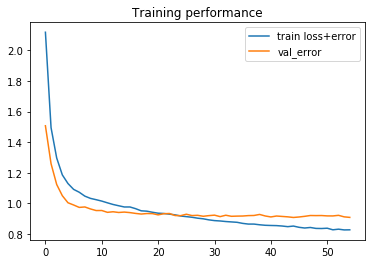

In [42]:
# Show loss curves 
plt.figure()
plt.title('Training performance')
plt.plot(HIS.epoch, HIS.history['loss'], label='train loss+error')
plt.plot(HIS.epoch, HIS.history['val_loss'], label='val_error')
plt.legend()

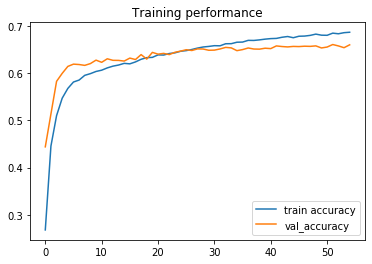

In [43]:
plt.figure()
plt.title('Training performance')
plt.plot(HIS.epoch, HIS.history['accuracy'], label='train accuracy')
plt.plot(HIS.epoch, HIS.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [44]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Reds, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

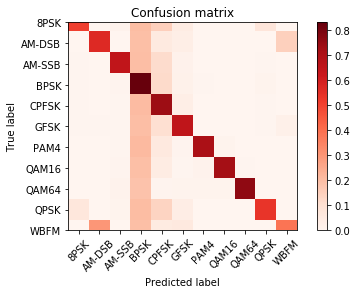

In [45]:
# Plot confusion matrix
test_Y_hat = cnn.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)
# on the right its a color chart to indicate that the darker the color the easier and thee most to identify

Overall Accuracy:  0.14765721331689272
Overall Accuracy:  0.14770274437249462
Overall Accuracy:  0.1598159509202454
Overall Accuracy:  0.16899658278968624
Overall Accuracy:  0.19655797101449277
Overall Accuracy:  0.2834158415841584
Overall Accuracy:  0.4614678899082569
Overall Accuracy:  0.6403864132128388
Overall Accuracy:  0.7768698931489629
Overall Accuracy:  0.9132699969353356
Overall Accuracy:  0.9137134052388289
Overall Accuracy:  0.9053254437869822
Overall Accuracy:  0.9208588957055215
Overall Accuracy:  0.9245921822099108
Overall Accuracy:  0.9017554665845395
Overall Accuracy:  0.9267769607843137
Overall Accuracy:  0.9342145711650784
Overall Accuracy:  0.8977166093212386
Overall Accuracy:  0.9279975278121138
Overall Accuracy:  0.9433085501858736


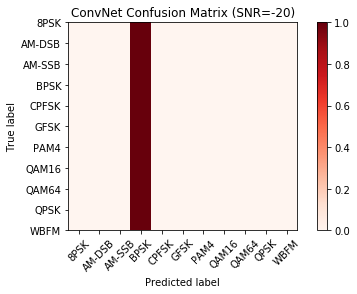

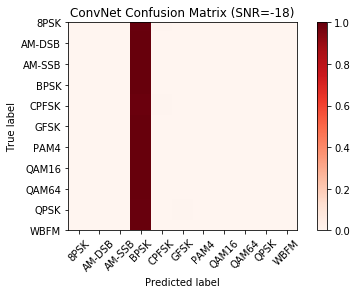

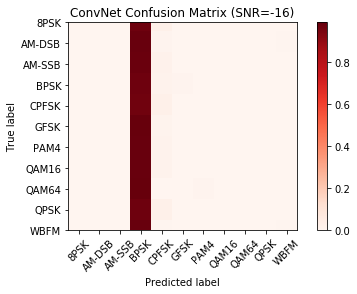

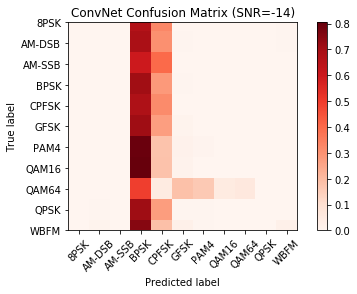

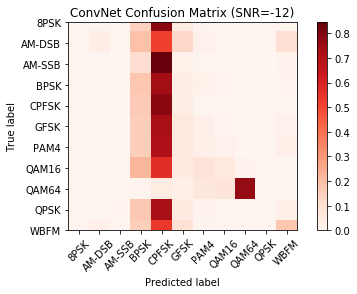

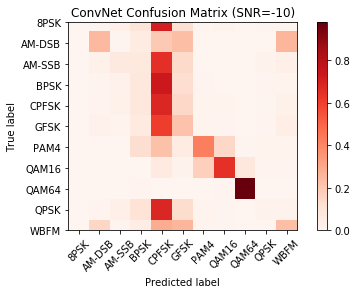

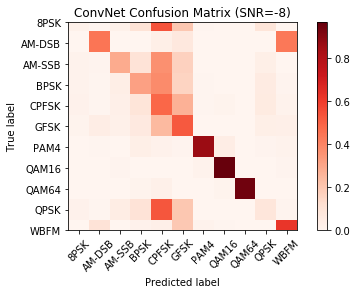

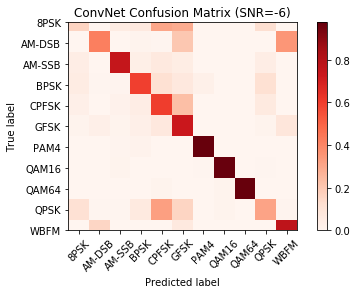

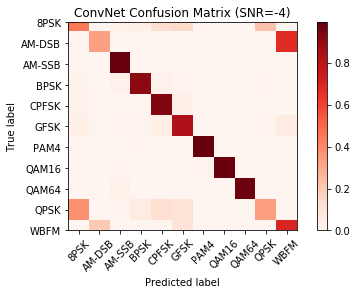

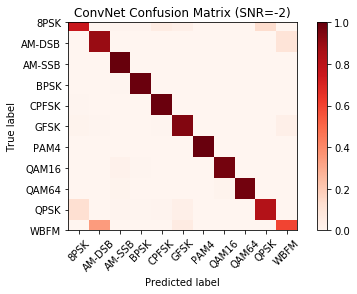

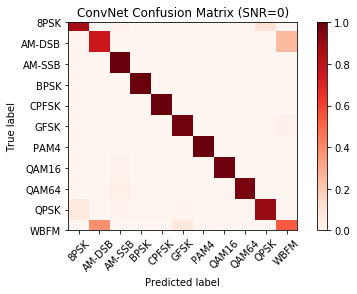

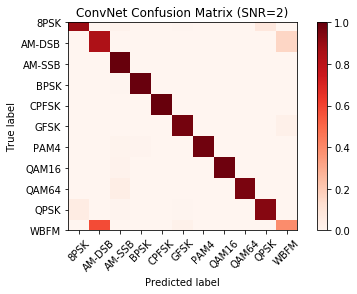

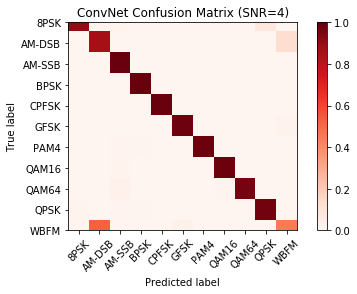

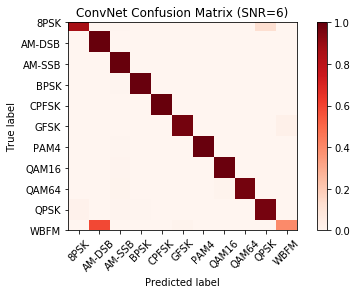

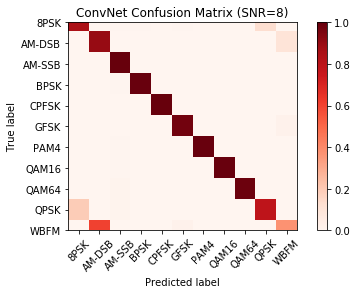

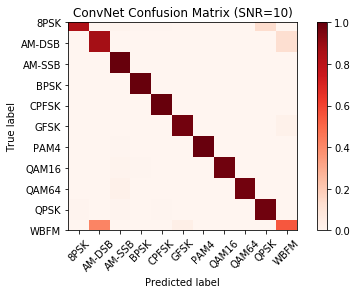

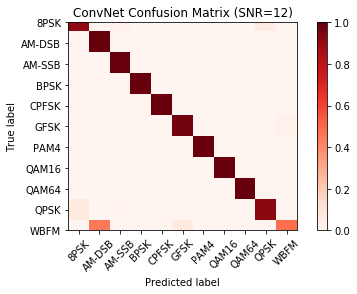

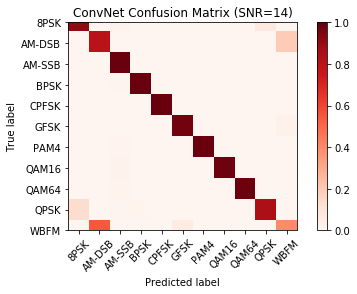

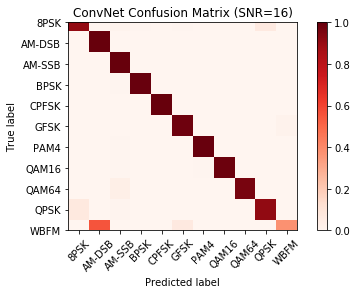

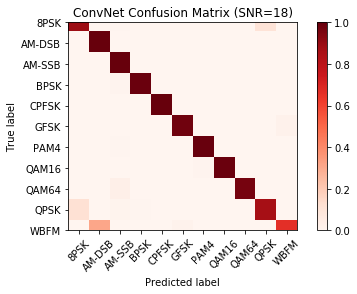

In [46]:
# Plot confusion matrix
acc = {}
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    # estimate classes
    test_Y_i_hat = cnn.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

Text(0.5, 1.0, 'CNN2 Classification Accuracy on RadioML 2016.10 Alpha')

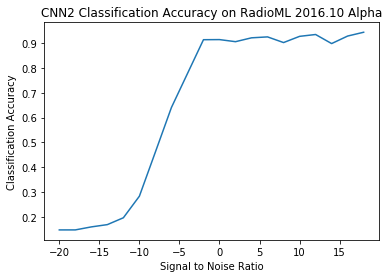

In [47]:
# Plot accuracy curve
plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy on RadioML 2016.10 Alpha")